# CSC17104 – Programming for Data Science 
## Final Project: **Analyzing Mobile Device Usage and User Behavior**

## Group Members:
- 22127152 - Lê Gia Huy
- 22127031 - Nguyễn Duy Bảo
- 22127203 - Võ Ngọc Khoa


## 1. Collecting Data

### Dataset Overview
- **Subject**: The dataset focuses on **mobile device usage and user behavior**, capturing metrics like app usage time, screen-on time, battery consumption, and demographic details.
- **Source**: The data is titled "Mobile Device Usage and User Behavior Dataset," authored by **Seyedvala Khorasani** with collaboration from **Vala Khorasani**, and is available on [Kaggle](https://www.kaggle.com/).

### Data License and Usage
- The dataset is released under the **Apache License, Version 2.0**.  
- This license permits the use of the dataset for educational, research, and commercial purposes, provided that appropriate credit is given and modifications (if any) are documented.  
- For full details of the license, refer to the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

### Data Collection Method
#### Sources
The dataset was generated using simulated data based on realistic mobile usage patterns, informed by:
- Publicly available research studies
- Industry reports from organizations like **Statista** and **Pew Research**
- Surveys related to mobile device usage

#### Collection Methodology
To create the dataset:
1. **Key Variables**: Defined using common metrics in mobile usage research, such as:
   - App usage time
   - Screen-on time
   - Battery drain
   - Data usage
   - Demographic details (age and gender)
2. **User Profiles**: Generated to represent diverse mobile usage behaviors, with app usage time randomized within realistic ranges.
3. **Behavior Patterns**:
   - App usage time varies between 30 to 300 minutes per day.
   - Screen-on time aligns with app usage patterns.
   - Battery drain and data usage are estimated based on average device specifications and typical user habits.
4. **Data Structuring**: The data was organized into a CSV format with clearly defined columns for ease of analysis.
5. **Quality Assurance**:
   - Consistency and accuracy were ensured through quality checks.
   - Data reflects diverse user behavior classes.
6. **Ethical Considerations**:
   - No personally identifiable information is included.
   - Simulated data respects user privacy.

#### Updates
- The dataset is periodically updated to reflect emerging trends in mobile device usage.
- Users are encouraged to provide feedback to support future enhancements.


## 2. Import necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data exploring & Data preprocessing

Read the datasest and display basic information about the dataset

In [2]:
file_path = 'user_behavior_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


### 3.1. The meaning of each column/row


How many rows and how many columns?

In [3]:
n_rows, n_cols = data.shape
print(f'Number of rows: ',n_rows)
print(f'Number of cols: ',n_cols)

Number of rows:  700
Number of cols:  11


#### The meaning of each row:
- Each row provides some infomation about a single user’s mobile usage behavior, device characteristics, and demographic information, which can be used for analysis and modeling.
#### The meaning of each column:
- User ID: Unique identifier for the user.
- Device Model: The specific model of the user’s smartphone.
- Operating System: The OS running on the user’s device (e.g., Android or iOS).
- App Usage Time (min/day): The total time (in minutes) the user spends on mobile apps daily.
- Screen On Time (hours/day): The total number of hours the screen remains active daily.
- Battery Drain (mAh/day): The daily battery consumption of the user’s device in milliampere-hours (mAh).
- Number of Apps Installed: Total number of applications installed on the user’s device.
- Data Usage (MB/day): The daily amount of mobile data consumed by the user in megabytes (MB).
- Age: The age of the user.
- Gender: The gender of the user (Male or Female).
- User Behavior Class: A classification (from 1 to 5) categorizing the user based on their mobile usage behavior (e.g., light, moderate, or extreme usage).

### 3.2. Duplicated rows

Are there duplicated rows?

In [4]:
duplicated_rows = data[data.duplicated()]

print(f"Number of duplicated rows: {len(duplicated_rows)}")

if len(duplicated_rows) > 0:
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found in the dataset.")

Number of duplicated rows: 0
No duplicated rows found in the dataset.


### 3.3. What is the current data type of each column? Are there columns having inappropriate data types?

In [5]:
print("Data types of each column:")
data.dtypes

Data types of each column:


User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

After examining the dataset, we observed that the columns `Device Model`, `Operating System`, and `Gender` are of type `object`. Since these columns only contain categorical or textual data, it is more efficient and appropriate to convert them to more specific types. Here are the reasons and suggested conversions:

Why Convert `Device Model` and `Operating System` to `string`?
- **Device Model** and **Operating System** contain textual data, such as the model names of devices and the operating system types ('iOS', 'Android'). 
- Converting these columns to `string` helps ensure that they are treated explicitly as text and optimizes string operations, improving performance and consistency.

Why Convert `Gender` to `category`?
- The **Gender** column contains a small number of unique values (e.g., 'Male', 'Female'), making it an ideal candidate for the `category` data type.
- Using `category` instead of `object` for this column improves memory efficiency and allows for faster categorical operations (such as comparisons and aggregations).

In [6]:
data['Device Model'] = data['Device Model'].astype('string')
data['Operating System'] = data['Operating System'].astype('string')
data['Gender'] = data['Gender'].astype('category')

In [7]:
print("Data types of each column:")
data.dtypes

Data types of each column:


User ID                                int64
Device Model                  string[python]
Operating System              string[python]
App Usage Time (min/day)               int64
Screen On Time (hours/day)           float64
Battery Drain (mAh/day)                int64
Number of Apps Installed               int64
Data Usage (MB/day)                    int64
Age                                    int64
Gender                              category
User Behavior Class                    int64
dtype: object

In our dataset, we have two columns that represent time-related data but are measured in different units:

- **App Usage Time (min/day)**: Represented in minutes.
- **Screen On Time (hours/day)**: Represented in hours.

To make analysis easier and more consistent, it is better to standardize these columns to the same unit of measurement. Since **App Usage Time** is already in **minutes/day**, we will convert **Screen On Time (hours/day)** into **minutes/day** for consistency.

##### Why Convert the Units?
1. **Consistency**: Using the same unit for both columns will ensure consistency across the dataset and avoid confusion when comparing or combining these columns.
2. **Simplified Analysis**: Having both time-based columns in the same unit makes mathematical operations (such as comparisons or aggregations) more straightforward.
3. **Ease of Modeling**: Most machine learning models and statistical analyses expect consistent units, and standardizing the units simplifies feature engineering.

In [8]:
data['Screen On Time (min/day)'] = data['Screen On Time (hours/day)'] * 60
data = data.drop(columns=['Screen On Time (hours/day)'])

In [9]:
data[['App Usage Time (min/day)', 'Screen On Time (min/day)']]

,App Usage Time (min/day),Screen On Time (min/day)
0,393,384.0
1,268,282.0
2,154,240.0
3,239,288.0
4,187,258.0
...,...,...
695,92,234.0
696,316,408.0
697,99,186.0
698,62,102.0


These changes ensure that the data is properly formatted and optimized for analysis, and the dataset is now ready for further exploration and modeling.

### 3.4. With each numerical column, how are values distributed?

Numerical Columns to Analyze:
- App Usage Time (min/day)
- Screen On Time (hours/day)
- Battery Drain (mAh/day)
- Number of Apps Installed
- Data Usage (MB/day)
- Age
- User Behavior Class

#### 3.4.1. What is the percentage of missing values?

In [10]:
numerical_columns = [
    'App Usage Time (min/day)',
    'Screen On Time (min/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age',
    'User Behavior Class'
]

for column in numerical_columns:
    print(f"Analyzing column: {column}")
    
    missing_percentage = data[column].isnull().mean() * 100
    print(f"Percentage of missing values: {missing_percentage:.2f}%")
    
    print("-" * 50) 

Analyzing column: App Usage Time (min/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Screen On Time (min/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Battery Drain (mAh/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Number of Apps Installed
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Data Usage (MB/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Age
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: User Behavior Class
Percentage of missing values: 0.00%
--------------------------------------------------


#### 3.4.2. Min? max? Are they abnormal?

In [11]:
for column in numerical_columns:
    print(f"Analyzing column: {column}")
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"Min: {min_value}, Max: {max_value}")
    
    if min_value < 0 or max_value > data[column].quantile(0.99):  
        print(f"Warning: Potential abnormal values detected in {column}")
    print("-" * 50) 

Analyzing column: App Usage Time (min/day)
Min: 30, Max: 598
--------------------------------------------------
Analyzing column: Screen On Time (min/day)
Min: 60.0, Max: 720.0
--------------------------------------------------
Analyzing column: Battery Drain (mAh/day)
Min: 302, Max: 2993
--------------------------------------------------
Analyzing column: Number of Apps Installed
Min: 10, Max: 99
--------------------------------------------------
Analyzing column: Data Usage (MB/day)
Min: 102, Max: 2497
--------------------------------------------------
Analyzing column: Age
Min: 18, Max: 59
--------------------------------------------------
Analyzing column: User Behavior Class
Min: 1, Max: 5
--------------------------------------------------


Based on the analysis of the numerical columns, we observed that several columns have maximum values that exceed the 99th percentile, which may indicate the presence of outliers. Specifically, the following columns have been flagged:

- App Usage Time (min/day): Max = 598
- Screen On Time (hours/day): Max = 12.0
- Battery Drain (mAh/day): Max = 2993
- Data Usage (MB/day): Max = 2497

While these values are not necessarily incorrect, they are higher than most of the data points, which could indicate **outliers** or **extreme values**.

##### Next Steps:
To investigate further, we should visualize the distributions of these numerical columns. Plotting **box plots** and **histograms** will help us better understand the spread of the data and determine if any values are indeed outliers that may require adjustment or removal.

Let's proceed with visualizing the data to assess if any actions are needed.

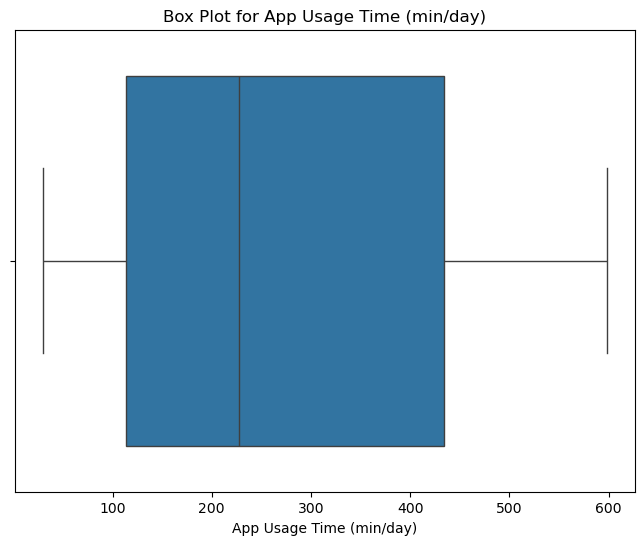

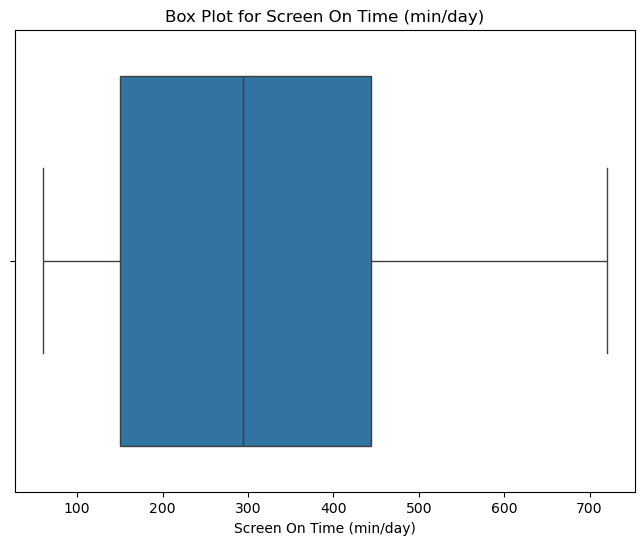

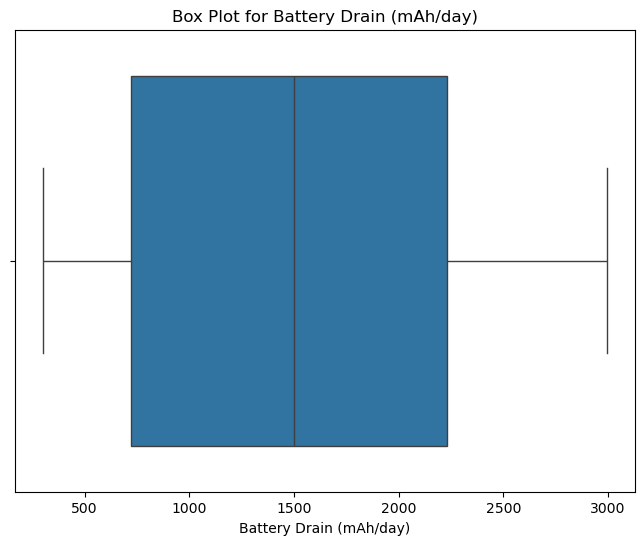

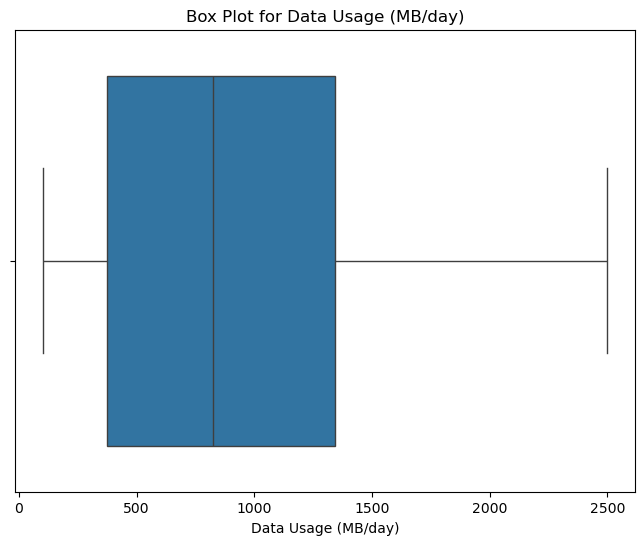

In [12]:
numerical_columns = [
    'App Usage Time (min/day)',
    'Screen On Time (min/day)',
    'Battery Drain (mAh/day)',
    'Data Usage (MB/day)'
]

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

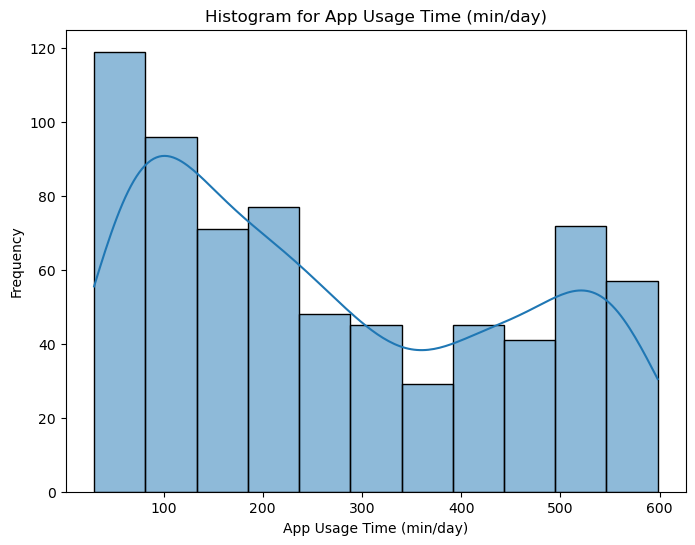

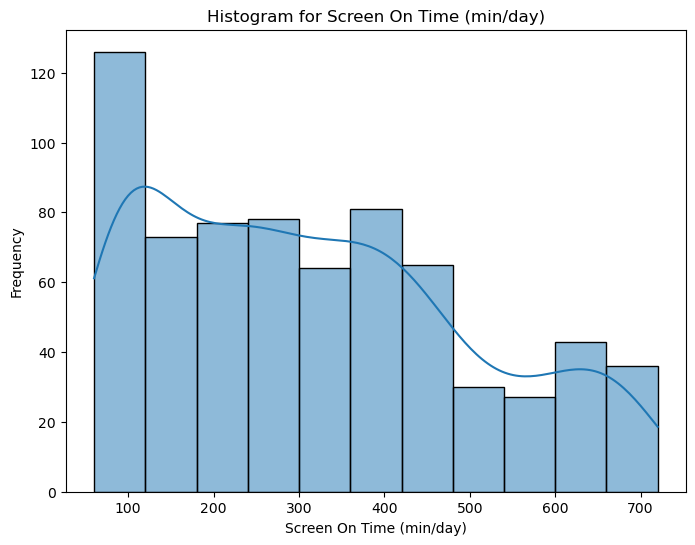

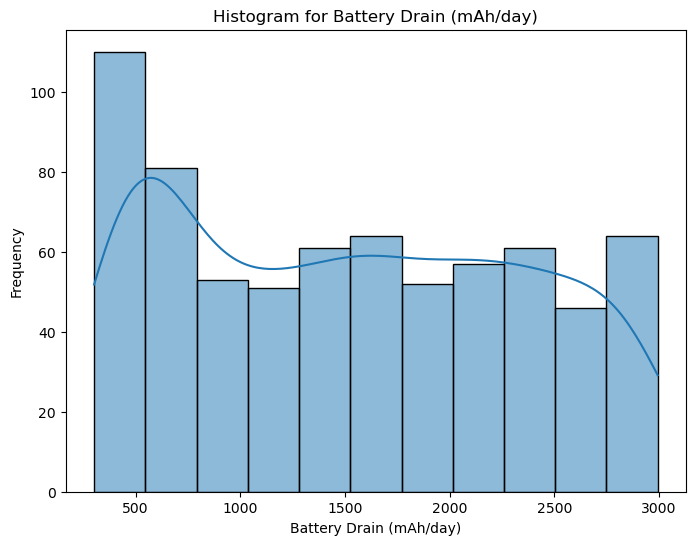

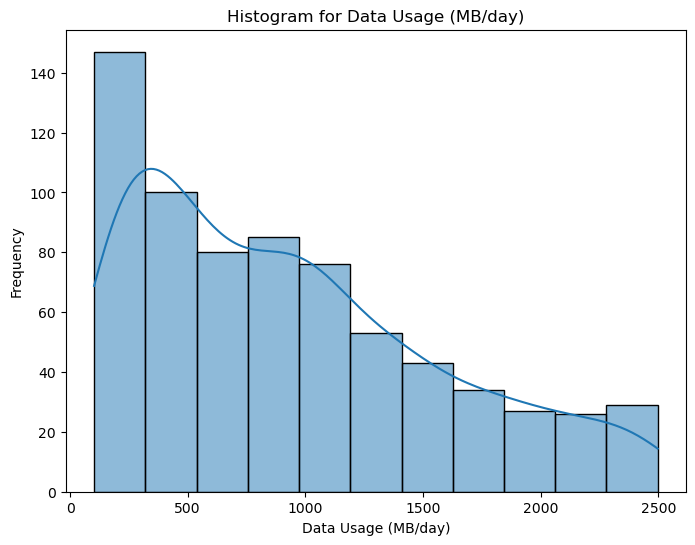

In [13]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # 'kde' adds the kernel density estimate
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##### Conclusion on Outliers

After reviewing the **box plots** and **histograms** for the numerical columns, we observed that there are no significant abnormalities or extreme outliers in the data. The values appear to follow expected distributions, and there are no obvious data points that fall far outside the normal range.

##### Outcome:
- The **max values** in columns like **App Usage Time (min/day)**, **Screen On Time (hours/day)**, **Battery Drain (mAh/day)**, and **Data Usage (MB/day)**, which were flagged during the initial analysis, do not represent outliers that require further action.
- The overall distribution of the data appears to be reasonable, and the dataset is ready for further analysis without any need for outlier removal or adjustments.

Therefore, no additional data cleaning or transformation is required for outliers at this stage.

### 3.5. With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [14]:
categorical_columns = data.select_dtypes(include=['category', 'string']).columns
categorical_summary = {}
for column in categorical_columns:
    column_data = data[column]
    categorical_summary[column] = {
        'Missing Percentage': column_data.isnull().mean() * 100,
        'Unique Values Count': column_data.nunique(),
        'Sample Values': column_data.unique()[:5]
    }

for column, stats in categorical_summary.items():
    print(f"\nColumn: {column}")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")
    print("-" * 50)


Column: Device Model
  Missing Percentage: 0.0
  Unique Values Count: 5
  Sample Values: <StringArray>
[    'Google Pixel 5',          'OnePlus 9',       'Xiaomi Mi 11',
          'iPhone 12', 'Samsung Galaxy S21']
Length: 5, dtype: string
--------------------------------------------------

Column: Operating System
  Missing Percentage: 0.0
  Unique Values Count: 2
  Sample Values: <StringArray>
['Android', 'iOS']
Length: 2, dtype: string
--------------------------------------------------

Column: Gender
  Missing Percentage: 0.0
  Unique Values Count: 2
  Sample Values: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
--------------------------------------------------


We have analyzed the three categorical columns: **Device Model**, **Operating System**, and **Gender**. Below are the findings:

##### 1. **Device Model**:
- **Percentage of Missing Values**: 0.00%
- **Number of Unique Values**: 5
- **Sample Unique Values**: 
    - Google Pixel 5
    - OnePlus 9
    - Xiaomi Mi 11
    - iPhone 12
    - Samsung Galaxy S21
- **Conclusion**: No abnormal values detected. The device models appear to be a reasonable set of common smartphones.

##### 2. **Operating System**:
- **Percentage of Missing Values**: 0.00%
- **Number of Unique Values**: 2
- **Sample Unique Values**: 
    - Android
    - iOS
- **Conclusion**: The values are as expected, with only two operating systems (Android and iOS), which is typical for mobile devices.

##### 3. **Gender**:
- **Percentage of Missing Values**: 0.00%
- **Number of Unique Values**: 2
- **Sample Unique Values**: 
    - Male
    - Female
- **Conclusion**: The data contains two categories for gender. While these are the most common categories in many datasets, it's important to be mindful of the fact that the dataset does not account for other gender identities. If necessary, this column could be expanded to reflect a more inclusive set of categories.

##### Summary:
- All categorical columns have no missing values and contain a reasonable number of unique values.
- No abnormalities have been found in the data for the categorical variables.

## 4. Asking meaningful questions